<a href="https://colab.research.google.com/github/eridu-origin/T-C-Prologue-Decode/blob/main/message_reveal_1916_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reveal Message from T & C Prologue
Prologue to Troilus and Cressida 1623 First Folio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Powell Prologue 1916"

'Powell Prologue to Troilus and Cressida.gsheet'
'Powell Prologue to Troilus and Cressida.tsv'


In [ ]:
import pandas as pd

data_file_name = '/content/drive/MyDrive/Powell Prologue 1916/Powell Prologue to Troilus and Cressida.tsv'
data = pd.read_csv(data_file_name,sep='\t')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# read the target image
target_file_name = input('Enter the target file name: ')
#print(target_file_name)
img = cv2.imread(target_file_name, cv2.IMREAD_COLOR)

Enter the target file name: /content/drive/MyDrive/Template Match 1623/Targets/TC 4 sentences source image 895.png


In [ ]:
# convert target from BGR to RGB
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# and convert target from BGR to GRAY
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

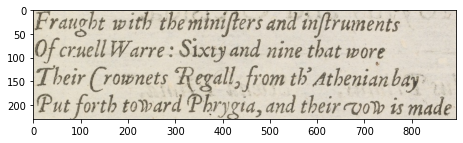

In [ ]:
# and here we check the given target image
fig = plt.figure(figsize=(80,2))
plt.imshow(imgRGB)
plt.show()

In [ ]:
# read the template image:
template_file_name = input('Enter the template file name: ')
template = cv2.imread(template_file_name, 0)

Enter the template file name: /content/drive/MyDrive/Template Match 1623/Templates/TC c 0b.png


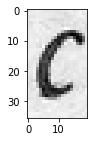

In [ ]:
# check the selected template image:
fig = plt.figure(figsize=(2,2))
plt.imshow(template, cmap="gray")
plt.show()

In [ ]:
# then get the shape of the template:
w, h = template.shape[::-1]

In [ ]:
# Apply the template matching.
# Remember, that the size of the template should 
# be as much as possible the same, as it is size in the target image

# So, we take our image, our template and the template matching method
res = cv2.matchTemplate(imgGray,
                        template,
                        cv2.TM_CCOEFF_NORMED)

In [ ]:
# Suppose we are searching for an object which has multiple occurrences.
# In that case, we will use thresholding. 
# Let's make the threshold 0.7
threshold = 0.9

In [ ]:
# then we get the locations, that have values bigger, than our threshold
loc = np.where(res >= threshold)

In [ ]:
# and we plot the rectangles around locations that are found
for pt in zip(*loc[::-1]):
  cv2.rectangle(imgRGB,
                pt,
                (pt[0]+w, pt[1]+h),
                (255, 0, 255),
                1)

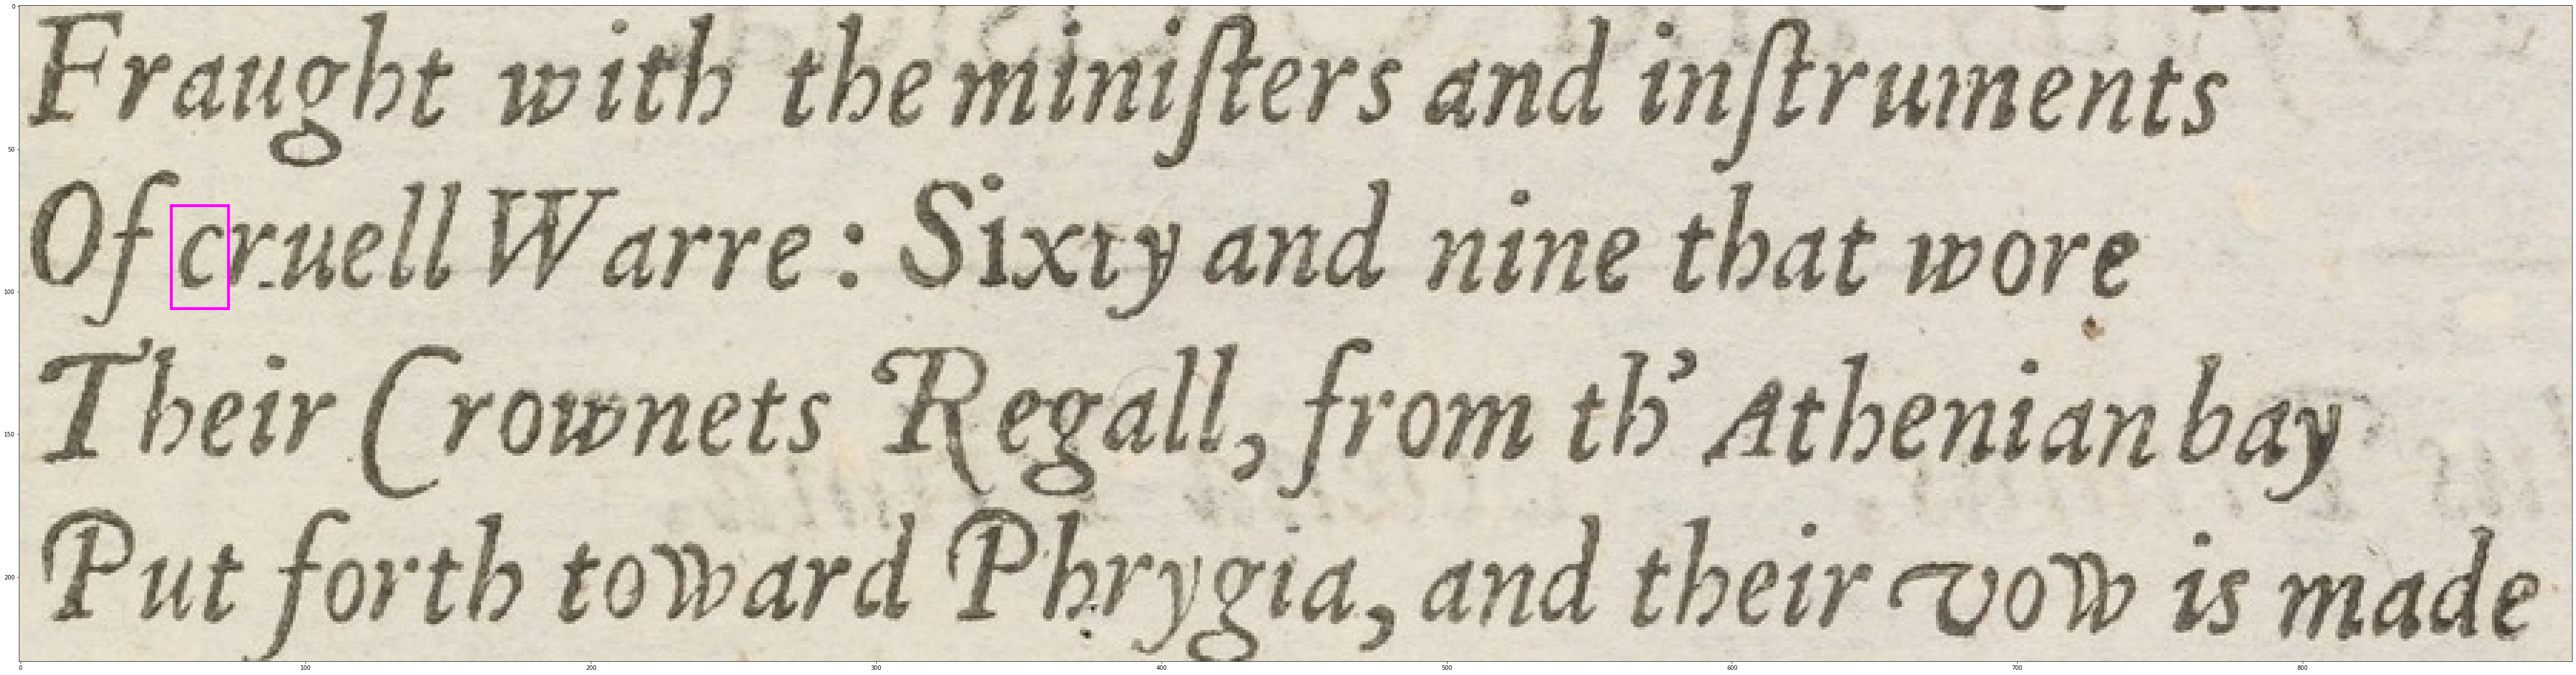

In [ ]:
fig = plt.figure(figsize=(80,80))
plt.imshow(imgRGB)
# plt.show()
# plt.savefig('/content/drive/MyDrive/Template Match 1623/T and C')